## Part 1: Configure current directory

In [1]:
# (1) set your output directory (i.e., the downloaded folder for this tutorial), replace backslashes with forward slashes, put a '/' at the end.
import os
output_dir = os.getcwd()+'/output/'
%matplotlib inline

## Part 2: Connect to PostgreSQL

In [2]:
# (1) set host and port, then run
import  psycopg2
conn = None
try:
    conn = psycopg2.connect(
        host = '',
        port = '',
        dbname = 'cohe_6430',
        user = 'cohe_external',
        password = 'cohe_external_password'
    )
    print('Connection successful')
except Exception as e:
    print('Unable to connect', e)

Connection successful


## Part 3: Patients

In [3]:
# (1) import pandas as pd.
import pandas as pd

In [4]:
# (2) read m3.patients. 
patients = pd.read_sql_query('SELECT * FROM m3.patients', con = conn)

In [5]:
# (3) print formatted DataFrame table. 
patients

,patient_id,gender,race,religion,birth_year,marital_status,language,state,country,zip
0,10,M,WHITE,METHODIST,1935.0,MARRIED,None,IA,USA,503xx
1,12,F,None,None,1947.0,None,None,IL,USA,None
2,14,F,WHITE,NO PREFERENCE,1973.0,MARRIED,None,MI,None,488xx
3,22,M,None,None,1960.0,None,None,IA,USA,None
4,24,F,WHITE,CATHOLIC,1926.0,SINGLE,None,IA,None,501xx
...,...,...,...,...,...,...,...,...,...,...
99995,99897,M,None,None,1957.0,None,None,IA,USA,None
99996,99927,M,None,None,NaN,None,None,None,None,None
99997,99929,F,CAUCASIAN,None,1955.0,None,None,IA,USA,528xx
99998,99965,F,None,None,1959.0,None,None,IA,USA,None


### Part 3.A: Profile Patients

In [6]:
# (1) describe patient, include = 'all'. 
patients.describe(include='all')

,patient_id,gender,race,religion,birth_year,marital_status,language,state,country,zip
count,100000.000000,100000,35740,32339,96648.000000,36518,25,96573,95662,55410
unique,NaN,3,14,53,NaN,7,5,61,80,726
top,NaN,F,CAUCASIAN,NO PREFERENCE,NaN,MARRIED,SPANISH,IA,USA,522xx
freq,NaN,54458,20203,9754,NaN,15746,13,78850,95214,11980
mean,50000.500000,NaN,NaN,NaN,1952.135906,NaN,NaN,NaN,NaN,NaN
std,28867.657797,NaN,NaN,NaN,19.663183,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,1921.000000,NaN,NaN,NaN,NaN,NaN
25%,25000.750000,NaN,NaN,NaN,1936.000000,NaN,NaN,NaN,NaN,NaN
50%,50000.500000,NaN,NaN,NaN,1955.000000,NaN,NaN,NaN,NaN,NaN
75%,75000.250000,NaN,NaN,NaN,1967.000000,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

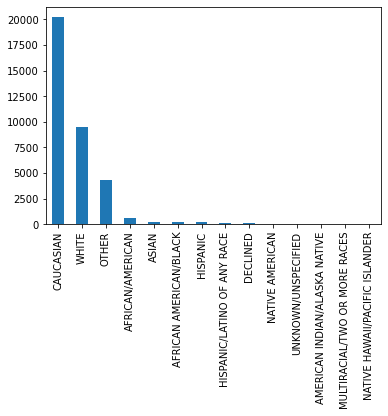

In [7]:
# (2) plot race value counts as a bar chart. 
patients.race.value_counts().plot.bar()

<AxesSubplot:>

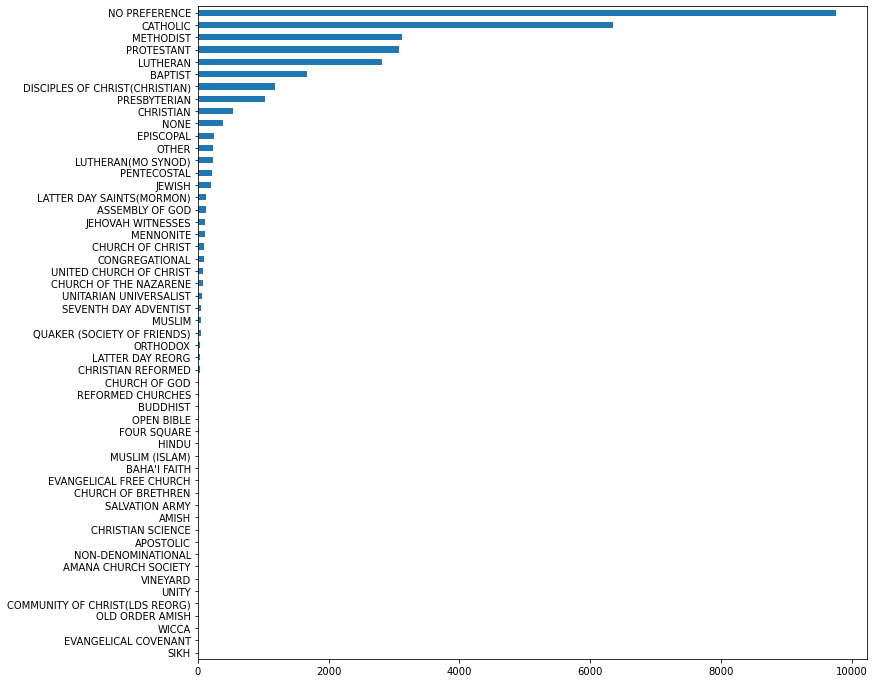

In [8]:
# (3) plot religion value counts as a horizontal bar 
patients.religion.value_counts(ascending=True).plot.barh(figsize=(12,12))

## Part 4: Encounters

In [9]:
# (1) read m3.encounters. 
encounters = pd.read_sql_query('SELECT * FROM m3.encounters', con = conn)

## Part 5: Pandas Profiling

In [10]:
# nothing to change, just run
import pandas_profiling

# profile function
def profile(df, file):
    # execute profiler
    df_profile = pandas_profiling.ProfileReport(df)

    # create output directory structure if necessary 
    html_output = output_dir+file
    html_output_directory = os.path.dirname(html_output)
    if not os.path.exists(html_output_directory):
        os.makedirs(html_output_directory)
    
    # output profile to HTML file
    df_profile.to_file(html_output) 

# profile patients and encounters
profile(patients, 'patients_profile.html')
profile(encounters, 'encounters_profile.html')

## Part 6: Joins

### Part 6.A: Load Diseases and Disease_Types

In [11]:
# (1) read ALL m3.diseases and m3.disease_types directly into DataFrames.
diseases = pd.read_sql_query('SELECT * FROM m3.diseases', con = conn)
disease_types = pd.read_sql_query('SELECT * FROM m3.disease_types', con = conn)

### 6.B: Perform Joins

In [12]:
# (1) merge on disease_id and save as ddt 
ddt = diseases.merge(disease_types, on='disease_id')
ddt

,encounter_id,disease_id,weighting_factor,name,icd9,start_date,end_date
0,55500,14983,0.500000,POSTSURGICAL PERCUTANEOUS TRANSLUMINAL CORONAR...,V45.82,2010-07-29 08:34:09.570,9999-12-31 00:00:00
1,63339,14983,0.500000,POSTSURGICAL PERCUTANEOUS TRANSLUMINAL CORONAR...,V45.82,2010-07-29 08:34:09.570,9999-12-31 00:00:00
2,63341,14983,0.062500,POSTSURGICAL PERCUTANEOUS TRANSLUMINAL CORONAR...,V45.82,2010-07-29 08:34:09.570,9999-12-31 00:00:00
3,63349,14983,0.500000,POSTSURGICAL PERCUTANEOUS TRANSLUMINAL CORONAR...,V45.82,2010-07-29 08:34:09.570,9999-12-31 00:00:00
4,63356,14983,0.066667,POSTSURGICAL PERCUTANEOUS TRANSLUMINAL CORONAR...,V45.82,2010-07-29 08:34:09.570,9999-12-31 00:00:00
...,...,...,...,...,...,...,...
1294350,55238,226673,1.000000,JOINT EFFUSION OF ELBOW,719.02,2010-07-29 08:34:09.570,9999-12-31 00:00:00
1294351,55419,154066,1.000000,DIABETIC GANGRENE,250.70,2010-07-29 08:34:09.570,9999-12-31 00:00:00
1294352,55470,24195,0.500000,RECURRENT PANCREATITIS,577.1,2010-07-29 08:34:09.570,9999-12-31 00:00:00
1294353,55488,24195,0.500000,RECURRENT PANCREATITIS,577.1,2010-07-29 08:34:09.570,9999-12-31 00:00:00


In [13]:
# (2) merge ddt to encounters as eddt
# GETING ERROR MemoryError: Unable to allocate 66.8 MiB for an array with shape (8, 1094942) and data type float64

eddt = ddt.merge(encounters, on='encounter_id')
eddt

,encounter_id,disease_id,weighting_factor,name,icd9,start_date,end_date,patient_id,admit_date,discharge_date,...,age,bp_systolic,bp_diastolic,temperature,pulse,weight,height,respirations,primary_disease_id,inches
0,55500,14983,0.5000,POSTSURGICAL PERCUTANEOUS TRANSLUMINAL CORONAR...,V45.82,2010-07-29 08:34:09.570,9999-12-31 00:00:00,70592,2006-12-29 16:04:41.100,2006-12-30 04:00:41.100,...,29.0,140.0,78.0,NaN,74.0,4081.12,None,NaN,-1,NaN
1,55500,89898,0.5000,PTCA STATUS,V45.82,2010-07-29 08:34:09.570,9999-12-31 00:00:00,70592,2006-12-29 16:04:41.100,2006-12-30 04:00:41.100,...,29.0,140.0,78.0,NaN,74.0,4081.12,None,NaN,-1,NaN
2,63339,14983,0.5000,POSTSURGICAL PERCUTANEOUS TRANSLUMINAL CORONAR...,V45.82,2010-07-29 08:34:09.570,9999-12-31 00:00:00,36905,2006-10-05 05:24:28.977,2006-10-05 20:04:28.977,...,49.0,150.0,78.0,NaN,50.0,2843.04,None,NaN,-1,NaN
3,63339,4994,0.5000,"AMI NOS, UNSPECIFIED",410.90,2010-07-29 08:34:09.570,9999-12-31 00:00:00,36905,2006-10-05 05:24:28.977,2006-10-05 20:04:28.977,...,49.0,150.0,78.0,NaN,50.0,2843.04,None,NaN,-1,NaN
4,63341,14983,0.0625,POSTSURGICAL PERCUTANEOUS TRANSLUMINAL CORONAR...,V45.82,2010-07-29 08:34:09.570,9999-12-31 00:00:00,36905,2006-08-28 13:46:28.977,2006-09-12 09:03:28.977,...,49.0,138.0,70.0,98.06,90.0,2938.24,"5' 6""",16.0,-1,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294350,55063,192739,1.0000,RIGHT ANKLE INSTABILITY,718.87,2010-07-29 08:34:09.570,9999-12-31 00:00:00,36149,NaT,NaT,...,35.0,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN
1294351,55118,233772,1.0000,BLADDER MASS,236.7,2010-07-29 08:34:09.570,9999-12-31 00:00:00,93914,2010-07-30 20:56:12.487,2010-07-30 21:37:12.487,...,51.0,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN
1294352,55238,226673,1.0000,JOINT EFFUSION OF ELBOW,719.02,2010-07-29 08:34:09.570,9999-12-31 00:00:00,56112,NaT,NaT,...,84.0,NaN,NaN,NaN,NaN,NaN,None,NaN,226673,NaN
1294353,55419,154066,1.0000,DIABETIC GANGRENE,250.70,2010-07-29 08:34:09.570,9999-12-31 00:00:00,82936,NaT,NaT,...,58.0,NaN,NaN,NaN,NaN,NaN,None,NaN,154066,NaN


## Part 7: Readmission Reduction

### Part 7.A: Heart Failure (HF)

#### Part 7.A.I: HF Readmissions

In [14]:
# (1) filter eddt by HEART FAILURE and save as eddtHF

eddtHF = eddt[eddt.name == 'HEART FAILURE']
eddtHF

,encounter_id,disease_id,weighting_factor,name,icd9,start_date,end_date,patient_id,admit_date,discharge_date,...,age,bp_systolic,bp_diastolic,temperature,pulse,weight,height,respirations,primary_disease_id,inches
334317,27274,94474,1.00,HEART FAILURE,428.9,2010-07-29 08:34:09.570,9999-12-31 00:00:00,19507,2010-03-19 03:38:12.940,2010-03-19 11:30:12.940,...,49.0,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN
334473,31873,94474,1.00,HEART FAILURE,428.9,2010-07-29 08:34:09.570,9999-12-31 00:00:00,58329,NaT,NaT,...,83.0,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN
334495,32310,94474,1.00,HEART FAILURE,428.9,2010-07-29 08:34:09.570,9999-12-31 00:00:00,58329,2010-03-15 16:38:33.260,NaT,...,83.0,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN
655236,19625,94474,0.25,HEART FAILURE,428.9,2010-07-29 08:34:09.570,9999-12-31 00:00:00,84610,2010-03-31 14:25:47.597,2010-04-01 06:00:47.597,...,67.0,158.0,62.0,98.8,57.0,2788.80,"5' 4.961""",NaN,-1,64.961
950135,33367,94474,0.20,HEART FAILURE,428.9,2010-07-29 08:34:09.570,9999-12-31 00:00:00,19507,2010-06-20 20:51:12.940,2010-06-21 11:30:12.940,...,49.0,141.0,63.0,95.4,76.0,3474.45,"5' 2.992""",18.0,-1,62.992
1270081,27055,94474,0.50,HEART FAILURE,428.9,2010-07-29 08:34:09.570,9999-12-31 00:00:00,19507,2010-03-19 02:42:12.940,2010-03-19 11:30:12.940,...,49.0,133.0,63.0,NaN,80.0,3365.10,None,NaN,15437,NaN
1290196,1067862,94474,0.50,HEART FAILURE,428.9,2010-07-29 08:34:09.570,9999-12-31 00:00:00,1302,2009-06-28 09:16:48.137,2009-06-28 20:50:48.137,...,48.0,114.0,63.0,96.6,74.0,4582.04,"6' 5.559""",NaN,-1,77.559


In [15]:
# (2) self-join eddtHF on patient_id (yes, patient_id), limit by 30 days, and return only distinct patient_ids and admit_dates
# (2.1) SELECT attributes. 
atts = eddtHF.merge(eddtHF, on='patient_id')

# (2.2) merge eddtHF to itself on patient_id (yes, patient_id) and return only patient_id and admit_date_x, store as eddtHFReadmit
eddtHFReadmit = eddtHF.merge(eddtHF, on='patient_id') 

# (2.3) filter by those within 30 days: 
eddtHFReadmit = eddtHFReadmit[(eddtHFReadmit.admit_date_x > eddtHFReadmit.admit_date_y) & \
                                (eddtHFReadmit.admit_date_x <= eddtHFReadmit.admit_date_y + pd.DateOffset(days=30))]

# (2.4) show only distinct results: 
atts = ['patient_id', 'admit_date_x']
eddtHFReadmit = eddtHFReadmit[atts].groupby(atts, as_index = False).last()
eddtHFReadmit

,patient_id,admit_date_x
0,19507,2010-03-19 03:38:12.940


#### Part 7.A.II: Total HF's

In [16]:
# (1) return the total number of HEART FAILURE patients
# (1.1) SELECT attributes: these are from the original tables. 
attsT =  ['patient_id', 'admit_date']

# (1.2) show only distinct results: 
eddtHFTotal = eddtHF[attsT].groupby(attsT, as_index = False).last()
eddtHFTotal

,patient_id,admit_date
0,1302,2009-06-28 09:16:48.137
1,19507,2010-03-19 02:42:12.940
2,19507,2010-03-19 03:38:12.940
3,19507,2010-06-20 20:51:12.940
4,58329,2010-03-15 16:38:33.260
5,84610,2010-03-31 14:25:47.597


#### 7.A.III: Combine

In [17]:
# (1) store total and readmission counts in separate variables. 
total = eddtHFTotal.groupby(pd.DatetimeIndex(eddtHFTotal.admit_date).year)['admit_date'].count()
readmits = eddtHFReadmit.groupby(pd.DatetimeIndex(eddtHFReadmit.admit_date_x).year)['admit_date_x'].count()

# (2) concatentate the values into a single DataFrame (hfCounts): outer join on axis 1. 
hfCounts = pd.concat([total, readmits], join='outer', axis=1)

In [18]:
# (3) create a column named year and set it to the index value. 
hfCounts['year'] = hfCounts.index
hfCounts

,admit_date,admit_date_x,year
2009,1,NaN,2009
2010,5,1.0,2010


In [19]:
# (4) rename the columns: 'admit_date' to 'Total' and 'admit_date_x' to Readmissions'. 
hfCounts = hfCounts.rename(columns={'admit_date' : 'Total', 'admit_date_x' : 'Readmissions'})

In [20]:
# (5) add a new column named Rate and set it to Readmissions / Total. 
hfCounts['Rate'] = hfCounts['Readmissions'] / hfCounts['Total']

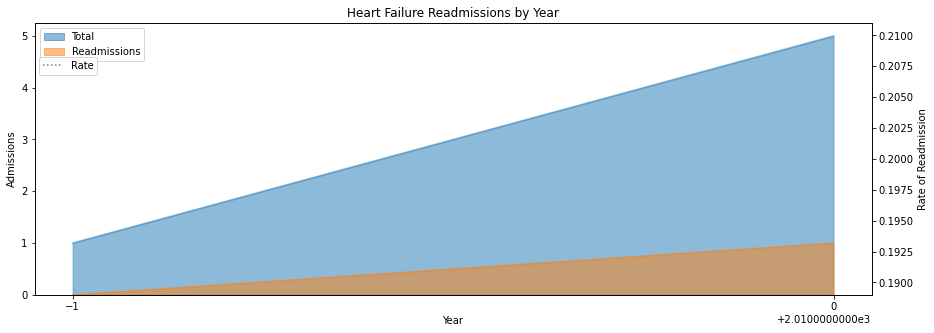

In [21]:
# (6) create a non-stacked area plot named ax of figsize 15x5 with title 'Heart Failure Readmissions by Year'. 
ax = hfCounts.Total.plot.area(stacked=False, figsize=(15,5), title='Heart Failure Readmissions by Year')

# (7) set the xlabel and xticks of ax to year. 
ax.set_xlabel('Year')
ax.set_xticks(hfCounts.year)

# (8) add readmissions to ax as a non-stacked area plot. 
hfCounts.Readmissions.plot.area(stacked=False, ax=ax)

# (9) add rate to ax, save as ax2: secondary_y=True, color='slategray', style=':'. 
ax2 = hfCounts.Rate.plot(secondary_y=True, color='slategray', style=':', ax=ax)

# static components
ax.set_xlabel('Year')
ax.set_ylabel('Admissions')
ax2.set_ylabel('Rate of Readmission')
leg = ax.legend(loc='upper left')
leg2 = ax2.legend(bbox_to_anchor=(0.081,0.895))